In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/NLP\ Project

Mounted at /content/gdrive
/content/gdrive/MyDrive/NLP Project


In [11]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import pickle

# Import Data and Embeddings

In [4]:
with open("HateXPlainData/trainHateXplain", "rb") as file:
  train_data = pickle.load(file)

with open("HateXPlainData/valHateXplain", "rb") as file:
  val_data = pickle.load(file)

with open("HateXPlainData/testHateXplain", "rb") as file:
  test_data = pickle.load(file)

In [5]:
train_w2v = np.load("HateXPlainData/Train_W2V_Embeddings.npy")
train_glove = np.load("HateXPlainData/Train_GloVe_Embeddings.npy")

val_w2v = np.load("HateXPlainData/Val_W2V_Embeddings.npy")
val_glove = np.load("HateXPlainData/Val_GloVe_Embeddings.npy")

test_w2v = np.load("HateXPlainData/Test_W2V_Embeddings.npy")
test_glove = np.load("HateXPlainData/Test_GloVe_Embeddings.npy")

# Process Data

In [6]:
labels = {'offensive': 2, 'hatespeech': 1, 'normal': 0}

train_tokens, train_labels = zip(*train_data)
train_labels = np.array([labels[l] for l in train_labels])

val_tokens, val_labels = zip(*val_data)
val_labels = [labels[l] for l in val_labels]

test_tokens, test_labels = zip(*test_data)
test_labels = np.array([labels[l] for l in test_labels])

# Logistic Regression w/ Word2Vec

In [7]:
w2v_model = LogisticRegression(max_iter=20000, multi_class='multinomial')

w2v_model.fit(train_w2v, train_labels)

LogisticRegression(max_iter=20000, multi_class='multinomial')

In [18]:
y_train_w2v_pred = w2v_model.predict(train_w2v)
y_val_w2v_pred = w2v_model.predict(val_w2v)
y_test_w2v_pred = w2v_model.predict(test_w2v)

Train Data Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.58      0.79      0.67      6251
           1       0.69      0.63      0.65      4748
           2       0.59      0.35      0.44      4384

    accuracy                           0.61     15383
   macro avg       0.62      0.59      0.59     15383
weighted avg       0.62      0.61      0.60     15383



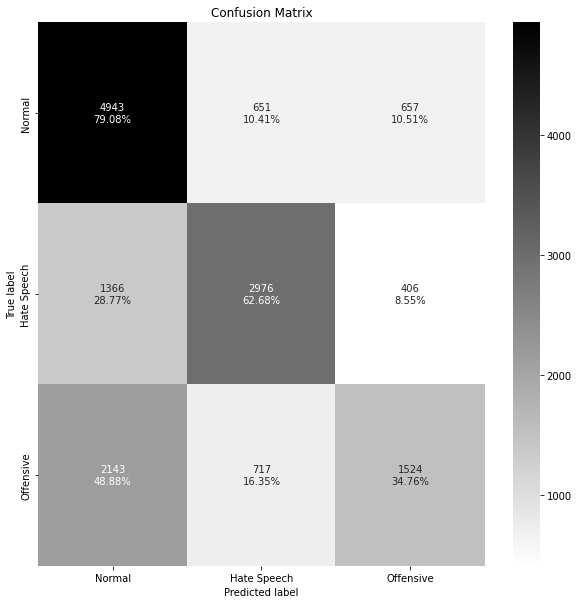

In [19]:
print("Train Data Accuracy: {0:0.2f}".format(accuracy_score(train_labels, y_train_w2v_pred)))
    
print(classification_report(train_labels, y_train_w2v_pred))
cf_matrix = confusion_matrix(train_labels, y_train_w2v_pred)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Validation Data Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.57      0.77      0.66       781
           1       0.69      0.60      0.64       593
           2       0.54      0.33      0.41       548

    accuracy                           0.60      1922
   macro avg       0.60      0.57      0.57      1922
weighted avg       0.60      0.60      0.58      1922



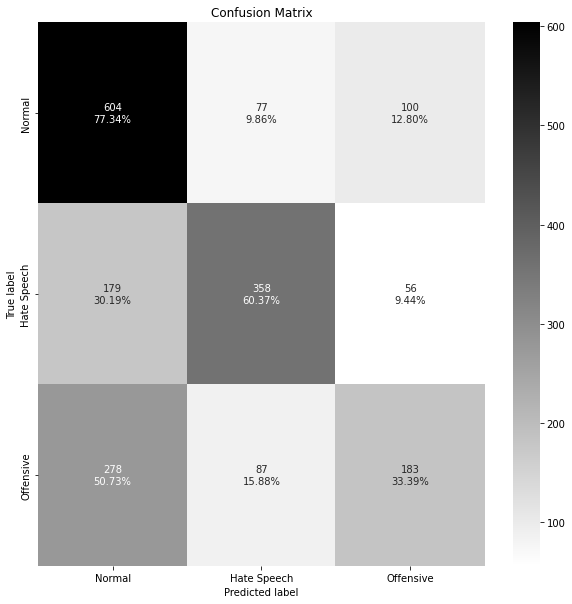

In [17]:
print("Validation Data Accuracy: {0:0.2f}".format(accuracy_score(val_labels, y_val_w2v_pred)))
    
print(classification_report(val_labels, y_val_w2v_pred))
cf_matrix = confusion_matrix(val_labels, y_val_w2v_pred)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Test Data Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.58      0.78      0.66       782
           1       0.67      0.60      0.63       594
           2       0.54      0.32      0.40       548

    accuracy                           0.59      1924
   macro avg       0.59      0.57      0.57      1924
weighted avg       0.59      0.59      0.58      1924



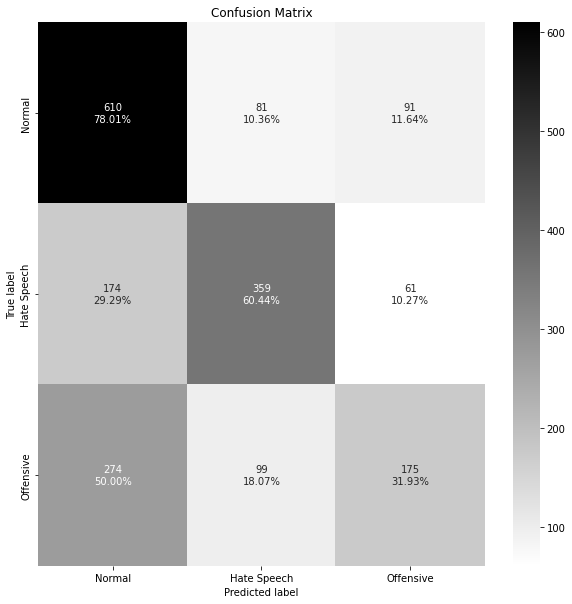

In [13]:
print("Test Data Accuracy: {0:0.2f}".format(accuracy_score(test_labels, y_test_w2v_pred)))
    
print(classification_report(test_labels, y_test_w2v_pred))
cf_matrix = confusion_matrix(test_labels, y_test_w2v_pred)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Logistic Regression w/ GloVe

In [14]:
glove_model = LogisticRegression(max_iter=20000, multi_class='multinomial')

glove_model.fit(train_glove, train_labels)

LogisticRegression(max_iter=20000, multi_class='multinomial')

In [16]:
y_train_glove_pred = glove_model.predict(train_glove)
y_val_glove_pred = glove_model.predict(val_glove)
y_test_glove_pred = glove_model.predict(test_glove)

Train Data Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.60      0.77      0.67      6251
           1       0.64      0.64      0.64      4748
           2       0.56      0.34      0.42      4384

    accuracy                           0.61     15383
   macro avg       0.60      0.58      0.58     15383
weighted avg       0.60      0.61      0.59     15383



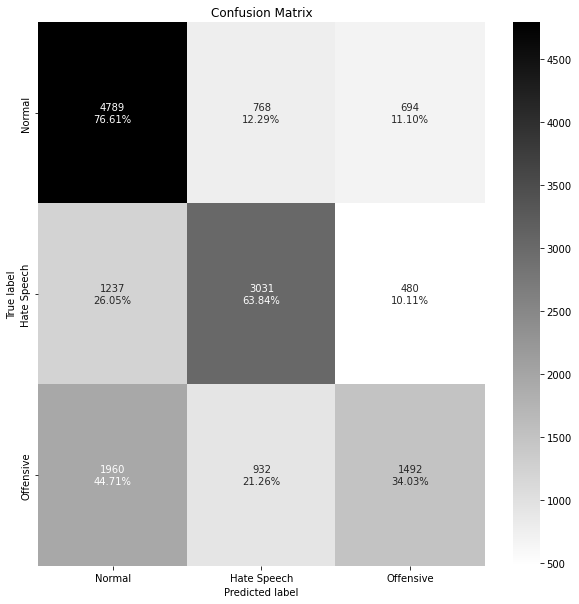

In [20]:
print("Train Data Accuracy: {0:0.2f}".format(accuracy_score(train_labels, y_train_glove_pred)))
    
print(classification_report(train_labels, y_train_glove_pred))
cf_matrix = confusion_matrix(train_labels, y_train_glove_pred)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Validation Data Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.59      0.74      0.65       781
           1       0.63      0.61      0.62       593
           2       0.49      0.34      0.40       548

    accuracy                           0.58      1922
   macro avg       0.57      0.56      0.56      1922
weighted avg       0.58      0.58      0.57      1922



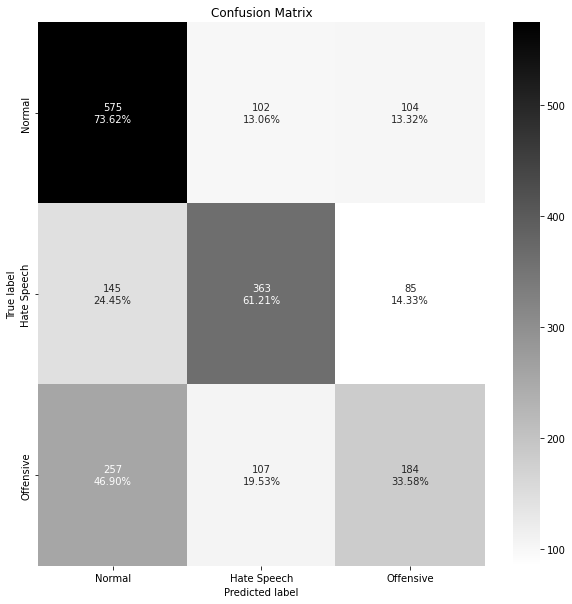

In [21]:
print("Validation Data Accuracy: {0:0.2f}".format(accuracy_score(val_labels, y_val_glove_pred)))
    
print(classification_report(val_labels, y_val_glove_pred))
cf_matrix = confusion_matrix(val_labels, y_val_glove_pred)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Test Data Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       782
           1       0.62      0.61      0.61       594
           2       0.54      0.34      0.41       548

    accuracy                           0.60      1924
   macro avg       0.59      0.57      0.57      1924
weighted avg       0.59      0.60      0.58      1924



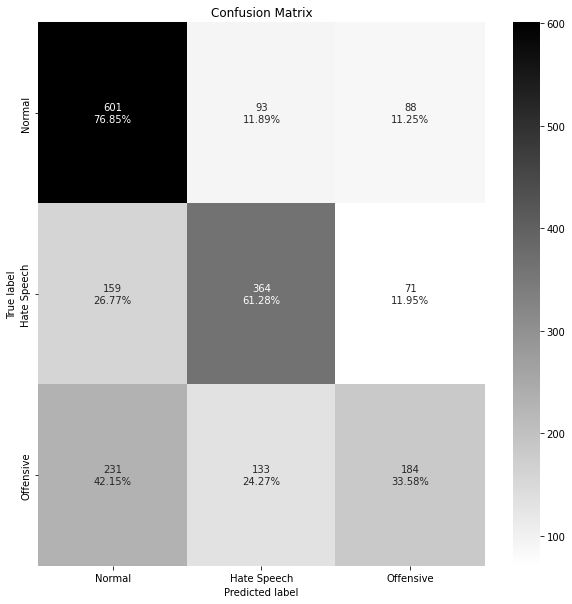

In [22]:
print("Test Data Accuracy: {0:0.2f}".format(accuracy_score(test_labels, y_test_glove_pred)))
    
print(classification_report(test_labels, y_test_glove_pred))
cf_matrix = confusion_matrix(test_labels, y_test_glove_pred)

label_counts = ["{}".format(value) for value in cf_matrix.flatten()]
label_percents = ["{0:.2%}".format(value / np.sum(row)) for row in cf_matrix for value in row]

box_labels = [f"{v1}\n{v2}\n".strip() for v1, v2 in zip(label_counts,label_percents)]
box_labels = np.asarray(box_labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, xticklabels=["Normal", "Hate Speech", "Offensive"], yticklabels=["Normal", "Hate Speech", "Offensive"], annot=box_labels, cmap='binary', fmt='')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()